In [7]:
from pathlib import Path
from tqdm import tqdm
import torch
import numpy as np

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

import config
import dataset

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Use pathlib.Path
data_path = Path(config.data_dir)
image_files = list(data_path.glob("*.png"))             # Creates a list of all the file names
targets = []
targets_orig = []
targets_unique = set()

# Loop through each file and create target list
for file in data_path.iterdir():
    targets_orig.append(file.stem)                      # append the filename
    targets.append(list(file.stem))                     # append the list of chars
    targets_unique.update(list(file.stem))              # keep track of unique chars

msg = "Number of target data-points: {}, \nUnique chars: {} \n"
print(msg.format(len(targets), sorted(targets_unique)))

# Label encode
le = preprocessing.LabelEncoder()
le.fit(sorted(targets_unique))                          # we only need the unique chars to map using LabelEncoder
targets_encoded = [le.transform(x) for x in targets]
targets_encoded = np.array(targets_encoded) + 1         # adding 1 because 0 represents "unkwown"

msg = "Encoded targets: \n{}"
print(msg.format(targets_encoded))

Number of target data-points: 1040, 
Unique chars: ['2', '3', '4', '5', '6', '7', '8', 'b', 'c', 'd', 'e', 'f', 'g', 'm', 'n', 'p', 'w', 'x', 'y'] 

Encoded targets: 
[[ 1  1  5 14 10]
 [ 1  1 10  4 15]
 [ 1  2  4  5 13]
 ...
 [19 19  7  1  3]
 [19 19 13  4 13]
 [19 19 15  4  6]]


In [3]:
# Split dataset
train_images, test_images, train_targets, test_targets, train_orig_targets, test_orig_targets = \
    model_selection.train_test_split(
        image_files, 
        targets_encoded, 
        targets_orig, 
        random_state=42,
        test_size=0.1, 
    )

train_dataset = dataset.ClassificationDataset(image_paths=train_images,
                                              targets=train_targets,
                                              resize=(config.image_height, config.image_width))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Channels first shape: torch.Size([3, 75, 300])
Channels last shape: (75, 300, 3)


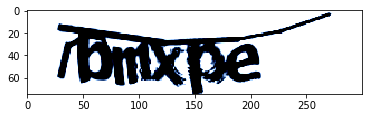

In [4]:
# Take any image and visualize it
img = train_dataset[12]["images"]
print("Channels first shape:", img.shape)

# To display the data, transpose back to "channels last"
img = np.transpose(img.numpy(), (1,2,0))
print("Channels last shape:", img.shape)
plt.imshow(img)


In [18]:
# Create a dataloader and then use tqdm to show how it works
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=config.batch_size,
    num_workers=config.num_workers,
    shuffle=True
)

tk = tqdm(train_loader, total=len(train_loader))

for data in tk:
    print(data.keys())
    print(data['images'].size(), data['targets'].size())
    break






  0%|                                                                                                                                                                                     | 0/117 [00:00<?, ?it/s]

dict_keys(['images', 'targets'])
torch.Size([8, 3, 75, 300]) torch.Size([8, 5])
dict_items([('images', tensor([[[[1.1700, 1.1700, 1.1700,  ..., 2.1804, 2.1804, 2.1804],
          [1.1700, 1.1700, 1.1700,  ..., 2.1804, 2.1804, 2.1804],
          [1.1700, 1.1700, 1.1700,  ..., 2.1804, 2.1804, 2.1804],
          ...,
          [1.2214, 1.2214, 1.2214,  ..., 2.2318, 2.2318, 2.2318],
          [1.2214, 1.2214, 1.2214,  ..., 2.2318, 2.2318, 2.2318],
          [1.2214, 1.2214, 1.2214,  ..., 2.2318, 2.2318, 2.2318]],

         [[1.3256, 1.3256, 1.3256,  ..., 2.3585, 2.3585, 2.3585],
          [1.3256, 1.3256, 1.3256,  ..., 2.3585, 2.3585, 2.3585],
          [1.3256, 1.3256, 1.3256,  ..., 2.3585, 2.3585, 2.3585],
          ...,
          [1.3782, 1.3782, 1.3782,  ..., 2.4111, 2.4111, 2.4111],
          [1.3782, 1.3782, 1.3782,  ..., 2.4111, 2.4111, 2.4111],
          [1.3782, 1.3782, 1.3782,  ..., 2.4111, 2.4111, 2.4111]],

         [[1.5420, 1.5420, 1.5420,  ..., 2.5703, 2.5703, 2.5703],
     

In [38]:
# example for items
dct = {'images': torch.rand(1,5), 'targets': torch.rand(1,5)}

for d in dct.items():
    print(d)

print("\n\n")
for d in dct.items():
    print(*d)
    
print("\n\nExplaining the usage of **data:")
def foo(images, targets):
    print(images, targets)
    
foo(**dct)

('images', tensor([[0.9759, 0.7338, 0.0199, 0.7804, 0.7524]]))
('targets', tensor([[0.6494, 0.9686, 0.4795, 0.4072, 0.0564]]))



images tensor([[0.9759, 0.7338, 0.0199, 0.7804, 0.7524]])
targets tensor([[0.6494, 0.9686, 0.4795, 0.4072, 0.0564]])


Explaining the usage of **data
tensor([[0.9759, 0.7338, 0.0199, 0.7804, 0.7524]]) tensor([[0.6494, 0.9686, 0.4795, 0.4072, 0.0564]])


In [24]:
for data in tk:
    for k, v in data.items():
        print(k, v.size())
    break

images torch.Size([8, 3, 75, 300])
targets torch.Size([8, 5])
